In [1]:
#Import dataset
from keras.datasets import cifar10

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

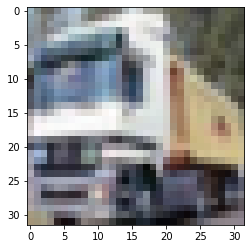

In [4]:
plt.imshow(X_train[1])
plt.show()

# Visualize 10 examples from each class, in a grid of 10x10 plots

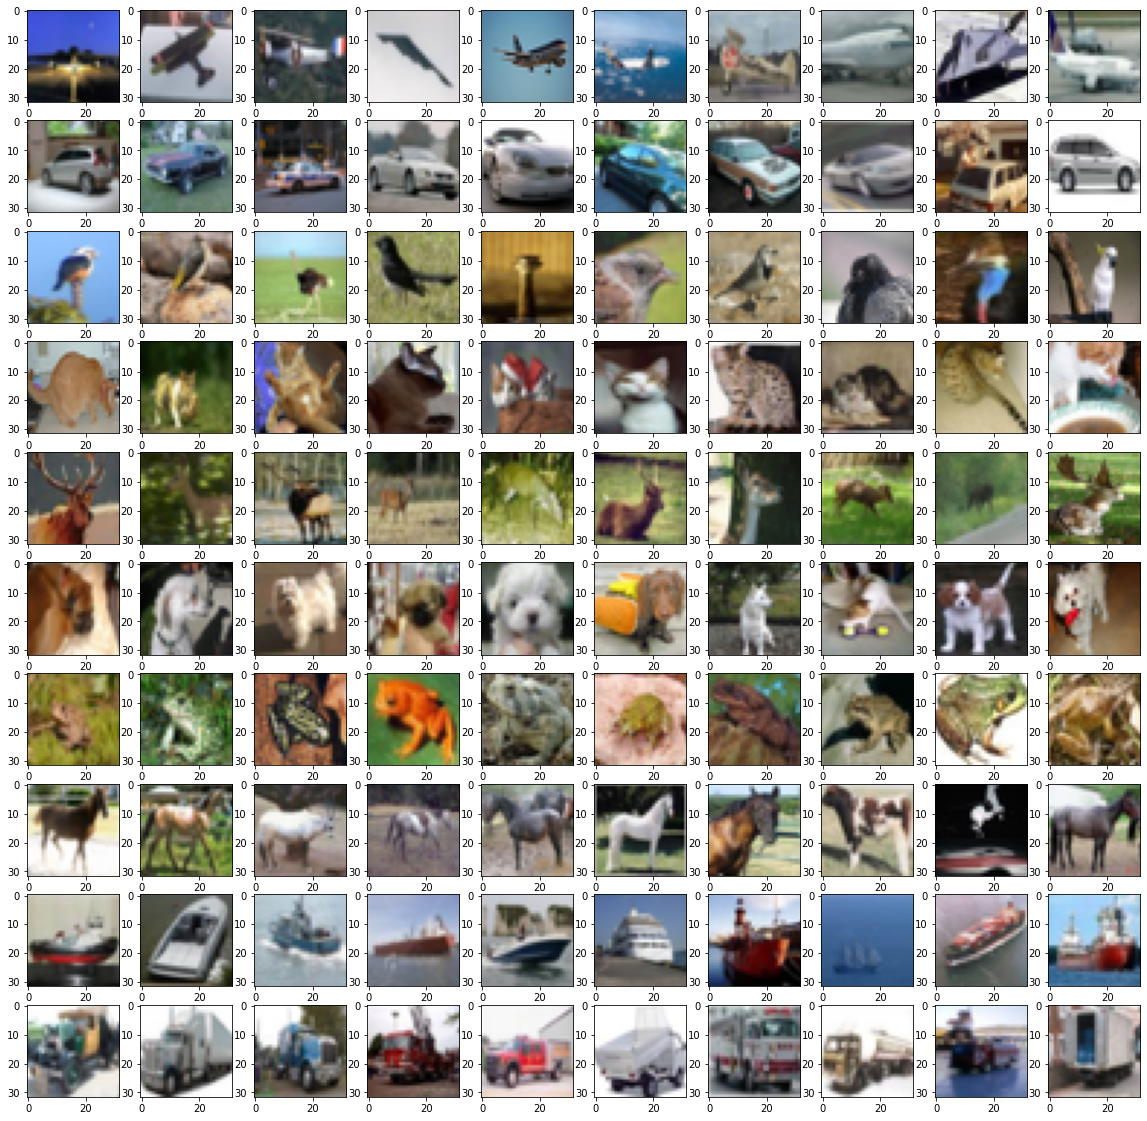

In [5]:
fig = plt.figure(figsize=(20, 20))

for i in range(10): 
    index_classi = np.where(y_train == i)[0].tolist()
    df = X_train[index_classi]
    sample = random.sample(list(df), 10)
    for j in range(10):
      ax = fig.add_subplot(10, 10, i*10 + j + 1)  
      image = plt.imshow(sample[j])


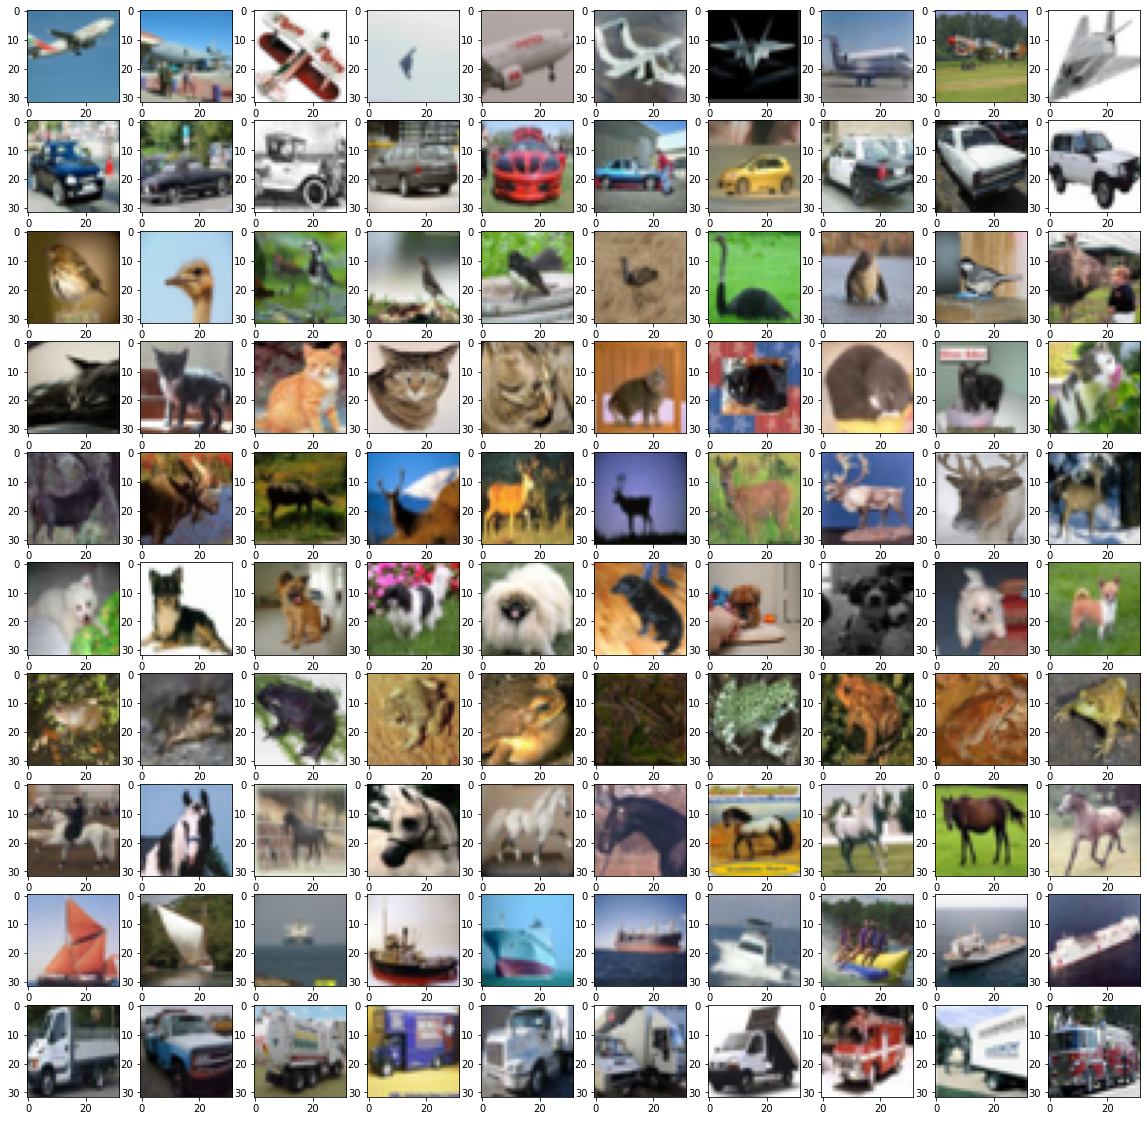

In [6]:
fig = plt.figure(figsize=(20, 20))

for i in range(10): 
    index_classi = np.where(y_test == i)[0].tolist()
    df = X_test[index_classi]
    sample = random.sample(list(df), 10)
    for j in range(10):
      ax = fig.add_subplot(10, 10, i*10 + j + 1)  
      image = plt.imshow(sample[j])

# Plot a histogram of number of examples per class in the training and test sets

In [7]:
n_train = {}
n_test = {}
for i in range(10):
  count_classi = len(np.where(y_train == i)[0].tolist())
  n_train[i] = count_classi

  count_classi = len(np.where(y_test == i)[0].tolist())
  n_test[i] = count_classi

In [8]:
X_train.shape

(50000, 32, 32, 3)

<BarContainer object of 10 artists>

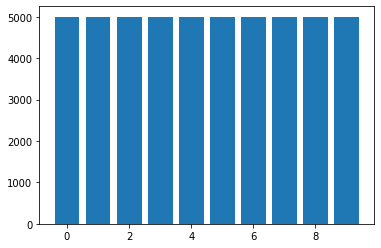

In [9]:
plt.bar(n_train.keys(), n_train.values())

In [10]:
X_test.shape

(10000, 32, 32, 3)

<BarContainer object of 10 artists>

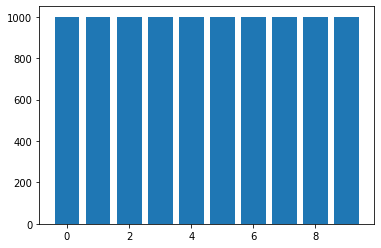

In [11]:
plt.bar(n_test.keys(), n_test.values())

# Train and test a model with 3 fully connected layers with the following architecture: 512-256-128

In [12]:
X_train.shape

(50000, 32, 32, 3)

In [13]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.3)

In [15]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16

In [17]:
model = VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None,
    classes=10,
    classifier_activation='softmax'
)

In [18]:
# freeze the layers
for layer in model.layers:
    layer.trainable = False

In [19]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [20]:
last_layer = model.get_layer('block3_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 4, 4, 256)


In [30]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf

In [31]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)

model = Model(model.input, x)

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [33]:
from tensorflow.keras.optimizers import Adam

In [35]:
# compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/2
1094/1094 [==============================] - 345s 315ms/step - loss: 118.0361 - acc: 0.5773 - val_loss: 42.7922 - val_acc: 0.6273
Epoch 2/2
1094/1094 [==============================] - 350s 320ms/step - loss: 29.7039 - acc: 0.6634 - val_loss: 24.5461 - val_acc: 0.6545


In [36]:
# Evaluate on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 66s 210ms/step - loss: 25.0196 - acc: 0.6570


[25.01961326599121, 0.6570000052452087]